In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


dataset_dir = '/Users/nguyenthiduy/Downloads/Final project/skin'
dataset = image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=16 ,
    shuffle=True
)
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
# history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[lr_scheduler])


def split_dataset(dataset, train_size=0.7, val_size=0.15, test_size=0.15):
    total_size = len(dataset)
    train_end = int(total_size * train_size)
    val_end = train_end + int(total_size * val_size)
    
    train_dataset = dataset.take(train_end)
    val_dataset = dataset.skip(train_end).take(val_end - train_end)
    test_dataset = dataset.skip(val_end)
    
    return train_dataset, val_dataset, test_dataset

train_dataset, val_dataset, test_dataset = split_dataset(dataset)

Found 391 files belonging to 5 classes.


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
# hp_units = hp.Int('units', min_value=512, max_value=1024, step=128)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
# model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('lr', [1e-3, 1e-4])),
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.3),
    RandomZoom(0.2)
])

def augment_data(dataset):
    def augment(image, label):
        image = data_augmentation(image)
        return image, label

    return dataset.map(augment)

train_dataset = augment_data(train_dataset)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    batch_size=16,
    # callbacks=[lr_scheduler]
)

Epoch 1/20
 5/17 ━━━━━━━━━━━━━━━━━━━━ 8s 710ms/step - accuracy: 0.3573 - loss: 1.9545

2025-01-20 22:55:24.507301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.3378 - loss: 1.8351

2025-01-20 22:55:36.286447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3364 - loss: 1.8296 - val_accuracy: 0.4167 - val_loss: 1.5512
Epoch 2/20
13/17 ━━━━━━━━━━━━━━━━━━━━ 3s 909ms/step - accuracy: 0.4347 - loss: 1.3746

2025-01-20 22:55:51.351184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 935ms/step - accuracy: 0.4261 - loss: 1.3846

2025-01-20 22:55:55.630919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4245 - loss: 1.3858 - val_accuracy: 0.4375 - val_loss: 1.3537
Epoch 3/20


2025-01-20 22:55:58.859374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.4379 - loss: 1.3408

2025-01-20 22:56:14.317940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4387 - loss: 1.3381 - val_accuracy: 0.5625 - val_loss: 1.1319
Epoch 4/20
 1/17 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7500 - loss: 0.7930

2025-01-20 22:56:18.748055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5821 - loss: 1.1210

2025-01-20 22:56:35.769742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5785 - loss: 1.1287 - val_accuracy: 0.5208 - val_loss: 1.1726
Epoch 5/20
 2/17 ━━━━━━━━━━━━━━━━━━━━ 14s 982ms/step - accuracy: 0.5938 - loss: 1.0250

2025-01-20 22:56:40.944634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5429 - loss: 1.1473

2025-01-20 22:56:56.318572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5419 - loss: 1.1492 - val_accuracy: 0.5208 - val_loss: 1.1475
Epoch 6/20
14/17 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5381 - loss: 1.1361

2025-01-20 22:57:14.350594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.5381 - loss: 1.1394

2025-01-20 22:57:16.766731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5380 - loss: 1.1410 - val_accuracy: 0.7708 - val_loss: 0.7783
Epoch 7/20
 4/17 ━━━━━━━━━━━━━━━━━━━━ 12s 975ms/step - accuracy: 0.5469 - loss: 1.1537

2025-01-20 22:57:23.381726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.5556 - loss: 1.1349

2025-01-20 22:57:35.839136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5564 - loss: 1.1333 - val_accuracy: 0.6250 - val_loss: 0.9321
Epoch 8/20
 2/17 ━━━━━━━━━━━━━━━━━━━━ 10s 706ms/step - accuracy: 0.5781 - loss: 0.8234

2025-01-20 22:57:40.146035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.6746 - loss: 0.8249

2025-01-20 22:57:51.347982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 888ms/step - accuracy: 0.6743 - loss: 0.8278 - val_accuracy: 0.6875 - val_loss: 0.8253
Epoch 9/20
 6/17 ━━━━━━━━━━━━━━━━━━━━ 8s 766ms/step - accuracy: 0.6837 - loss: 0.8338

2025-01-20 22:57:58.377438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.6448 - loss: 0.8967

2025-01-20 22:58:07.909500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6404 - loss: 0.9043 - val_accuracy: 0.6875 - val_loss: 0.8139
Epoch 10/20
14/17 ━━━━━━━━━━━━━━━━━━━━ 2s 829ms/step - accuracy: 0.5765 - loss: 0.9861

2025-01-20 22:58:23.033771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.5816 - loss: 0.9808

2025-01-20 22:58:25.641667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5828 - loss: 0.9797 - val_accuracy: 0.6250 - val_loss: 0.9618
Epoch 11/20


2025-01-20 22:58:28.465867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.6235 - loss: 0.8482

2025-01-20 22:58:44.496877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6228 - loss: 0.8515 - val_accuracy: 0.6458 - val_loss: 0.9623
Epoch 12/20


2025-01-20 22:58:47.727725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6386 - loss: 0.8973

2025-01-20 22:59:06.115511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6395 - loss: 0.8980 - val_accuracy: 0.6667 - val_loss: 0.8562
Epoch 13/20
 9/17 ━━━━━━━━━━━━━━━━━━━━ 6s 825ms/step - accuracy: 0.7447 - loss: 0.7688

2025-01-20 22:59:16.762786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.7113 - loss: 0.8092

2025-01-20 22:59:23.478975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7091 - loss: 0.8110 - val_accuracy: 0.6667 - val_loss: 0.8904
Epoch 14/20
12/17 ━━━━━━━━━━━━━━━━━━━━ 4s 939ms/step - accuracy: 0.7406 - loss: 0.7286

2025-01-20 22:59:38.212593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.7230 - loss: 0.7481

2025-01-20 22:59:42.701612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7200 - loss: 0.7513 - val_accuracy: 0.6875 - val_loss: 0.7896
Epoch 15/20
 7/17 ━━━━━━━━━━━━━━━━━━━━ 8s 835ms/step - accuracy: 0.7325 - loss: 0.6762

2025-01-20 22:59:51.733887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.7054 - loss: 0.7445

2025-01-20 23:00:00.397926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7042 - loss: 0.7466 - val_accuracy: 0.7500 - val_loss: 0.8002
Epoch 16/20
 5/17 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7881 - loss: 0.6168

2025-01-20 23:00:10.078075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7218 - loss: 0.7282

2025-01-20 23:00:24.527656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7195 - loss: 0.7350 - val_accuracy: 0.6667 - val_loss: 0.8381
Epoch 17/20


2025-01-20 23:00:27.669300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6618 - loss: 0.7935

2025-01-20 23:00:47.856730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6611 - loss: 0.7966 - val_accuracy: 0.7292 - val_loss: 0.7262
Epoch 18/20


2025-01-20 23:00:52.228273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.7076 - loss: 0.7575

2025-01-20 23:01:08.123354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7055 - loss: 0.7625 - val_accuracy: 0.6250 - val_loss: 0.8959
Epoch 19/20
 1/17 ━━━━━━━━━━━━━━━━━━━━ 15s 981ms/step - accuracy: 0.5625 - loss: 1.0229

2025-01-20 23:01:11.561696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7200 - loss: 0.8087

2025-01-20 23:01:35.901447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7182 - loss: 0.8108 - val_accuracy: 0.6667 - val_loss: 1.0117
Epoch 20/20
 9/17 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7584 - loss: 0.6857

2025-01-20 23:01:52.597204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7452 - loss: 0.7135

2025-01-20 23:02:05.504388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7431 - loss: 0.7166 - val_accuracy: 0.7083 - val_loss: 0.7478


In [5]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[lr_scheduler])


Epoch 1/20


2025-01-20 23:02:22.609024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.7266 - loss: 0.6844

2025-01-20 23:02:38.460404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7247 - loss: 0.6897 - val_accuracy: 0.6458 - val_loss: 0.8046 - learning_rate: 1.0000e-04
Epoch 2/20
 3/17 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7326 - loss: 0.7211

2025-01-20 23:02:45.972950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6888 - loss: 0.7785

2025-01-20 23:03:00.127981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6878 - loss: 0.7808 - val_accuracy: 0.6458 - val_loss: 0.8047 - learning_rate: 1.0000e-04
Epoch 3/20
 1/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8750 - loss: 0.6735

2025-01-20 23:03:04.247676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.7334 - loss: 0.6941

2025-01-20 23:03:19.718261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7302 - loss: 0.6980 - val_accuracy: 0.6458 - val_loss: 0.8486 - learning_rate: 1.0000e-04
Epoch 4/20
 7/17 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7274 - loss: 0.6263 

2025-01-20 23:03:29.818245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.7316 - loss: 0.6595

2025-01-20 23:03:39.287090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7299 - loss: 0.6638 - val_accuracy: 0.7917 - val_loss: 0.6877 - learning_rate: 1.0000e-04
Epoch 5/20


2025-01-20 23:03:42.076917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.7829 - loss: 0.6264

2025-01-20 23:03:58.477043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7809 - loss: 0.6298 - val_accuracy: 0.7500 - val_loss: 0.7063 - learning_rate: 1.0000e-04
Epoch 6/20
14/17 ━━━━━━━━━━━━━━━━━━━━ 2s 969ms/step - accuracy: 0.7292 - loss: 0.7077

2025-01-20 23:04:15.464916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.7340 - loss: 0.7046

2025-01-20 23:04:19.117110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7355 - loss: 0.7035 - val_accuracy: 0.6250 - val_loss: 0.8057 - learning_rate: 1.0000e-04
Epoch 7/20


2025-01-20 23:04:22.520772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7259 - loss: 0.6378

2025-01-20 23:04:40.689165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7273 - loss: 0.6387 - val_accuracy: 0.6667 - val_loss: 0.7840 - learning_rate: 1.0000e-04
Epoch 8/20


2025-01-20 23:04:42.991199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7820 - loss: 0.5626

2025-01-20 23:05:01.245062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7792 - loss: 0.5677 - val_accuracy: 0.6875 - val_loss: 0.6838 - learning_rate: 5.0000e-05
Epoch 9/20
 2/17 ━━━━━━━━━━━━━━━━━━━━ 12s 817ms/step - accuracy: 0.7812 - loss: 0.5008

2025-01-20 23:05:05.372998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.7953 - loss: 0.5633

2025-01-20 23:05:20.210670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7940 - loss: 0.5688 - val_accuracy: 0.7708 - val_loss: 0.7023 - learning_rate: 5.0000e-05
Epoch 10/20


2025-01-20 23:05:23.289598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.7939 - loss: 0.5879

2025-01-20 23:05:40.410540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7931 - loss: 0.5901 - val_accuracy: 0.7500 - val_loss: 0.7105 - learning_rate: 5.0000e-05
Epoch 11/20
 5/17 ━━━━━━━━━━━━━━━━━━━━ 11s 974ms/step - accuracy: 0.8248 - loss: 0.4984

2025-01-20 23:05:48.938590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.8178 - loss: 0.5265

2025-01-20 23:05:59.510006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8158 - loss: 0.5293 - val_accuracy: 0.6875 - val_loss: 0.7969 - learning_rate: 5.0000e-05
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.7677 - loss: 0.5938

2025-01-20 23:06:17.472511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7655 - loss: 0.5965 - val_accuracy: 0.6458 - val_loss: 0.8741 - learning_rate: 2.5000e-05
Epoch 13/20


2025-01-20 23:06:20.285283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.8266 - loss: 0.6042

2025-01-20 23:06:35.117924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8242 - loss: 0.6055 - val_accuracy: 0.7500 - val_loss: 0.6460 - learning_rate: 2.5000e-05
Epoch 14/20
13/17 ━━━━━━━━━━━━━━━━━━━━ 3s 954ms/step - accuracy: 0.8174 - loss: 0.5013

2025-01-20 23:06:50.752906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.8150 - loss: 0.5100

2025-01-20 23:06:55.050077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8135 - loss: 0.5130 - val_accuracy: 0.7500 - val_loss: 0.8541 - learning_rate: 2.5000e-05
Epoch 15/20
 1/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 0.3314

2025-01-20 23:06:59.764155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.7703 - loss: 0.5793

2025-01-20 23:07:13.736129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7696 - loss: 0.5804 - val_accuracy: 0.7917 - val_loss: 0.6585 - learning_rate: 2.5000e-05
Epoch 16/20
 7/17 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8053 - loss: 0.5128

2025-01-20 23:07:24.134266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7957 - loss: 0.5471

2025-01-20 23:07:35.600213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7956 - loss: 0.5502 - val_accuracy: 0.7292 - val_loss: 0.9170 - learning_rate: 2.5000e-05
Epoch 17/20


2025-01-20 23:07:39.646099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8557 - loss: 0.4780

2025-01-20 23:08:02.045280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8525 - loss: 0.4836 - val_accuracy: 0.8542 - val_loss: 0.5926 - learning_rate: 1.2500e-05
Epoch 18/20
 9/17 ━━━━━━━━━━━━━━━━━━━━ 6s 873ms/step - accuracy: 0.7820 - loss: 0.6071

2025-01-20 23:08:13.568112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.7702 - loss: 0.6220

2025-01-20 23:08:20.396599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7691 - loss: 0.6234 - val_accuracy: 0.8542 - val_loss: 0.5230 - learning_rate: 1.2500e-05
Epoch 19/20
 5/17 ━━━━━━━━━━━━━━━━━━━━ 9s 817ms/step - accuracy: 0.8367 - loss: 0.4719 

2025-01-20 23:08:27.230294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.8187 - loss: 0.5194

2025-01-20 23:08:37.566457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8175 - loss: 0.5211 - val_accuracy: 0.6875 - val_loss: 0.9074 - learning_rate: 1.2500e-05
Epoch 20/20


2025-01-20 23:08:41.110242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7855 - loss: 0.5238

2025-01-20 23:09:02.009735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7837 - loss: 0.5270 - val_accuracy: 0.7708 - val_loss: 0.6116 - learning_rate: 1.2500e-05


In [6]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

2025-01-20 23:09:21.502812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 711ms/step - accuracy: 0.8341 - loss: 0.5985
Test Accuracy: 0.7887


In [7]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_fine_tune = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    batch_size=16
)

Epoch 1/20
 4/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6185 - loss: 0.8854

2025-01-20 23:09:46.135117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6925 - loss: 0.7647

2025-01-20 23:10:06.711192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6951 - loss: 0.7613 - val_accuracy: 0.8333 - val_loss: 0.6060
Epoch 2/20
 8/17 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8356 - loss: 0.5791

2025-01-20 23:10:25.882996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8027 - loss: 0.6110

2025-01-20 23:10:42.018678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7989 - loss: 0.6151 - val_accuracy: 0.7708 - val_loss: 0.6936
Epoch 3/20
 6/17 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7967 - loss: 0.6073

2025-01-20 23:10:54.932536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7743 - loss: 0.6430

2025-01-20 23:11:11.227856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7734 - loss: 0.6460 - val_accuracy: 0.7708 - val_loss: 0.7600
Epoch 4/20
 4/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8516 - loss: 0.5473

2025-01-20 23:11:22.692401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8058 - loss: 0.6075

2025-01-20 23:11:41.336376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8033 - loss: 0.6117 - val_accuracy: 0.7500 - val_loss: 0.6132
Epoch 5/20
 4/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8216 - loss: 0.4952

2025-01-20 23:11:50.664822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7801 - loss: 0.5992

2025-01-20 23:12:10.875366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7782 - loss: 0.6055 - val_accuracy: 0.9167 - val_loss: 0.4463
Epoch 6/20
 9/17 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8401 - loss: 0.5750

2025-01-20 23:12:27.021706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8061 - loss: 0.6116

2025-01-20 23:12:36.673336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8030 - loss: 0.6153 - val_accuracy: 0.7500 - val_loss: 0.6626
Epoch 7/20
 1/17 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7500 - loss: 0.6297

2025-01-20 23:12:41.362220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7847 - loss: 0.5948

2025-01-20 23:13:02.230558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7836 - loss: 0.5977 - val_accuracy: 0.7083 - val_loss: 0.7212
Epoch 8/20
 4/17 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8112 - loss: 0.5756

2025-01-20 23:13:10.319124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8048 - loss: 0.5703

2025-01-20 23:13:27.363295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8024 - loss: 0.5744 - val_accuracy: 0.7917 - val_loss: 0.6548
Epoch 9/20
 3/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8507 - loss: 0.4779

2025-01-20 23:13:35.296056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8150 - loss: 0.5468

2025-01-20 23:13:53.127107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8124 - loss: 0.5524 - val_accuracy: 0.8750 - val_loss: 0.4786
Epoch 10/20
 5/17 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7925 - loss: 0.5744

2025-01-20 23:14:02.429751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8130 - loss: 0.5688

2025-01-20 23:14:16.634573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8136 - loss: 0.5687 - val_accuracy: 0.8333 - val_loss: 0.6039
Epoch 11/20


2025-01-20 23:14:19.762473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7986 - loss: 0.5579

2025-01-20 23:14:42.544707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7990 - loss: 0.5571 - val_accuracy: 0.8125 - val_loss: 0.6020
Epoch 12/20
14/17 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7653 - loss: 0.5758

2025-01-20 23:15:03.358938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7674 - loss: 0.5827

2025-01-20 23:15:07.192458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7680 - loss: 0.5845 - val_accuracy: 0.7500 - val_loss: 0.6440
Epoch 13/20
 7/17 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8484 - loss: 0.4779

2025-01-20 23:15:18.794882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8243 - loss: 0.5207

2025-01-20 23:15:30.974949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8231 - loss: 0.5230 - val_accuracy: 0.7292 - val_loss: 0.7033
Epoch 14/20
 1/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8125 - loss: 0.5381

2025-01-20 23:15:35.065430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8497 - loss: 0.4600

2025-01-20 23:15:56.065712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8490 - loss: 0.4611 - val_accuracy: 0.7917 - val_loss: 0.6199
Epoch 15/20
 7/17 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8613 - loss: 0.4384

2025-01-20 23:16:08.893472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8401 - loss: 0.4848

2025-01-20 23:16:21.223377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8375 - loss: 0.4892 - val_accuracy: 0.7292 - val_loss: 0.6696
Epoch 16/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8100 - loss: 0.5323

2025-01-20 23:16:44.380076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8085 - loss: 0.5361 - val_accuracy: 0.8125 - val_loss: 0.7145
Epoch 17/20
 1/17 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7500 - loss: 0.7275

2025-01-20 23:16:48.917497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7972 - loss: 0.5198

2025-01-20 23:17:07.701487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7970 - loss: 0.5210 - val_accuracy: 0.8542 - val_loss: 0.4860
Epoch 18/20
 8/17 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8904 - loss: 0.4120

2025-01-20 23:17:20.863759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8771 - loss: 0.4381

2025-01-20 23:17:31.163772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8739 - loss: 0.4427 - val_accuracy: 0.8750 - val_loss: 0.4232
Epoch 19/20
13/17 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8891 - loss: 0.4332

2025-01-20 23:17:48.898071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8836 - loss: 0.4467

2025-01-20 23:17:53.556305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8819 - loss: 0.4501 - val_accuracy: 0.8125 - val_loss: 0.5701
Epoch 20/20
 5/17 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8815 - loss: 0.3949

2025-01-20 23:18:01.963835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8476 - loss: 0.4554

2025-01-20 23:18:16.266257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8458 - loss: 0.4597 - val_accuracy: 0.8333 - val_loss: 0.5580


In [8]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

2025-01-20 23:19:28.577741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - accuracy: 0.8162 - loss: 0.5956
Test Accuracy: 0.8028


2025-01-20 23:19:35.709364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


2025-01-20 23:19:38.438319: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


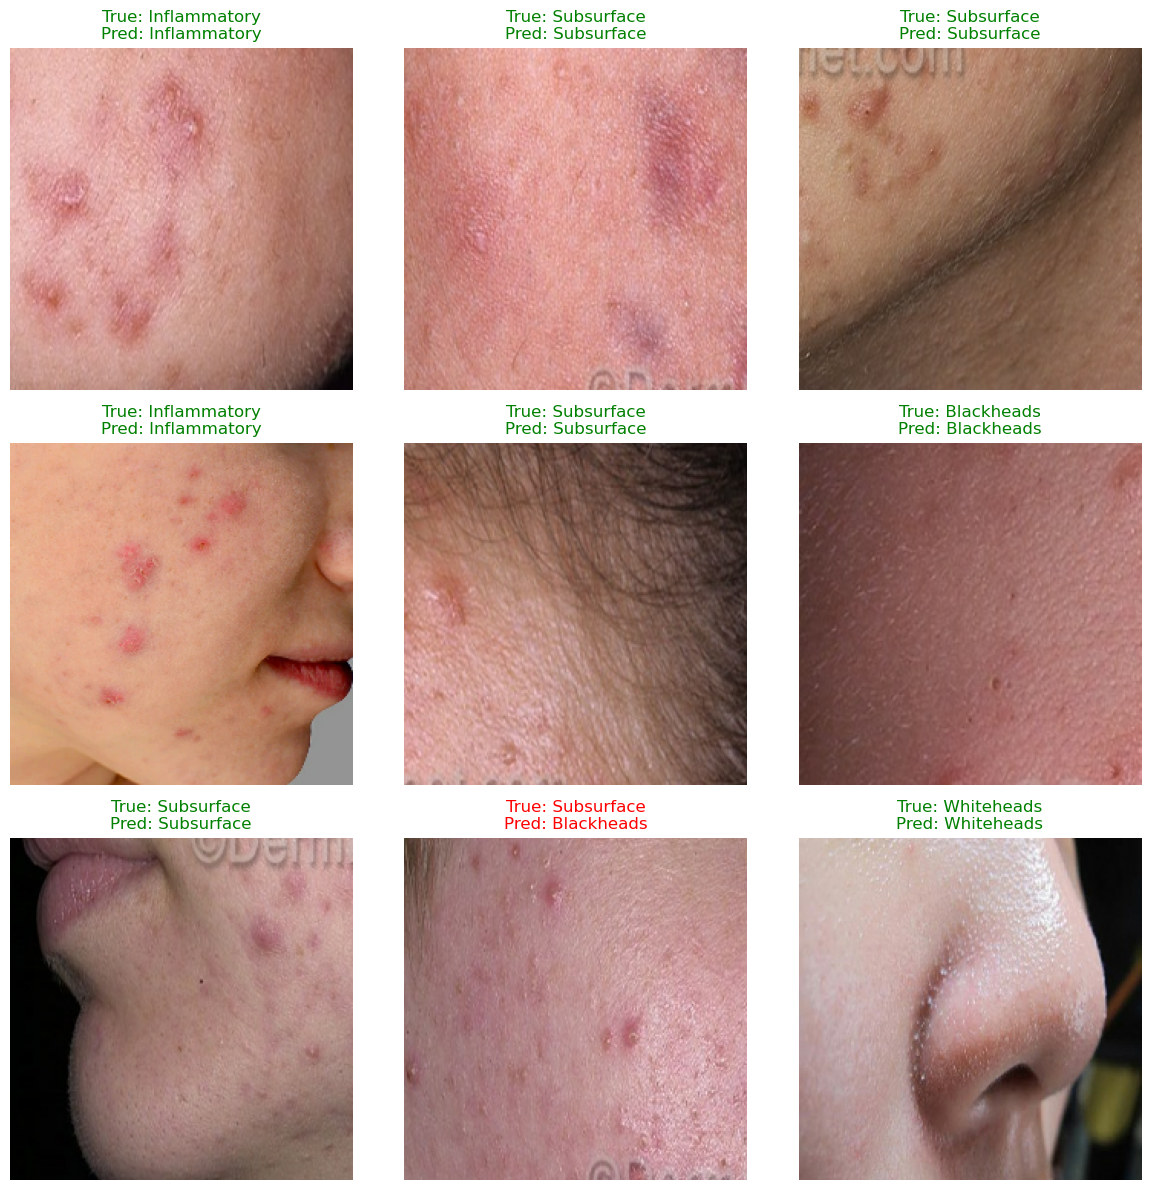

In [9]:
import matplotlib.pyplot as plt

class_names = [
    'Blackheads',
    'Inflammatory',
    'Papules',
    'Subsurface',
    'Whiteheads'
]

def plot_random_images(test_dataset, model, class_names, num_images=9):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()
    
    for image_batch, label_batch in test_dataset.take(1):
        predictions = model.predict(image_batch)
        predicted_labels = np.argmax(predictions, axis=1)
        indices = np.random.choice(len(image_batch), num_images, replace=False)
        
        for idx, ax in enumerate(axes):
            img = image_batch[indices[idx]].numpy().astype(np.uint8)
            true_label = label_batch[indices[idx]].numpy()
            pred_label = predicted_labels[indices[idx]]
            
            ax.imshow(img)
            ax.axis('off')
            
            true_label_name = class_names[true_label]
            pred_label_name = class_names[pred_label]
            title_color = 'green' if true_label == pred_label else 'red'
            ax.set_title(f"True: {true_label_name}\nPred: {pred_label_name}", color=title_color, fontsize=12)
    
    plt.tight_layout()
    plt.show()

plot_random_images(test_dataset, model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


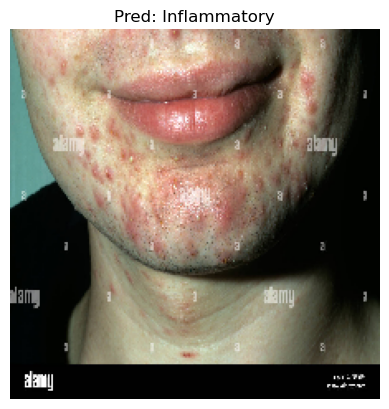

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

class_names = [
    'Blackheads',
    'Inflammatory',
    'Papules',
    'Subsurface',
    'Whiteheads'
]

def plot_single_image(image_path, model, class_names):
    # Nạp ảnh từ đường dẫn
    img = image.load_img(image_path, target_size=(224, 224))  # Thay đổi kích thước ảnh phù hợp với mô hình của bạn
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Thêm một chiều để ảnh phù hợp với batch size

    # Dự đoán nhãn từ mô hình
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions, axis=1)[0]  # Chọn nhãn có xác suất cao nhất

    # Hiển thị ảnh và nhãn
    plt.imshow(img)
    plt.axis('off')
    predicted_label_name = class_names[predicted_label]
    plt.title(f"Pred: {predicted_label_name}", fontsize=12)
    plt.show()

# Đường dẫn đến ảnh bạn muốn dự đoán
image_path = '/Users/nguyenthiduy/Downloads/Final project/skin/Inflammatory/facial-acne-showing-pustules-inflammation-ABF9BK.jpg'  # Thay bằng đường dẫn ảnh của bạn
plot_single_image(image_path, model, class_names)


In [16]:
print(f"Number of classes in model output: {predictions.shape[1]}")


Number of classes in model output: 5


In [17]:
model.save("model.keras")  # Lưu mô hình dưới dạng file .keras
